In [1]:
#결정 트리 - 분류, 회기가  모두 가능함. yes or no 로 이어가며 학습, 질문에 따라 데이터 구분

In [2]:
#질문이나 정답의 네무상자, node
#맨 처음 분류기준 : root node
#맨 마지막 분류기준 : terminal, leaf node

In [3]:
#질문들을 기준에 따라 나눠야지 -> 너무 많이 나누면 오버피팅 -> 막으려면 가지치기..  

In [4]:
#특성 중요도 : 트리를 만드는 결정에 각 특성이 얼마나 중요한가?
#결정 트리 장점 : 알고리즘이 직관적, 규칙파악 용이, 전처리 작업 덜 필요함
#결정 트리 단점 : 과적합, 유연성 낮고, 일반성 부족, 상대적 정확도 낮음


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()  #임시변수에 데이터셋 저장하는거 .. 이젠 당연!

In [8]:
X = iris.data
y = iris.target

In [9]:
df = pd.DataFrame(X, columns = ['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'])    
#df = pd.DataFrame(features, columns=feature_names)
#데이터 프레임으로 만듦

In [10]:
df.head()

,sepal_width(cm),sepal_length(cm),petal_width(cm),petal_length(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.model_selection import train_test_split      
#항상 했던거처럼 테스트용, 교육용을 나눠주는 거지 데이터를.. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
#데이터중 70퍼가 트레이닝용, 30퍼가 테스트 데이터


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()
#의사 결정 나무 생성

In [15]:
clf = clf.fit(X_train, y_train)
#의사결정 나무를 훈련 시킴


In [16]:
 y_pred = clf.predict(X_test)
#테스트 데이터 셋을 이용해 예측

In [17]:
from sklearn import metrics

In [18]:
print("Accuracy: " , metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9555555555555556


In [19]:
pip install graphviz

In [20]:
pip install pydotplus

In [21]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

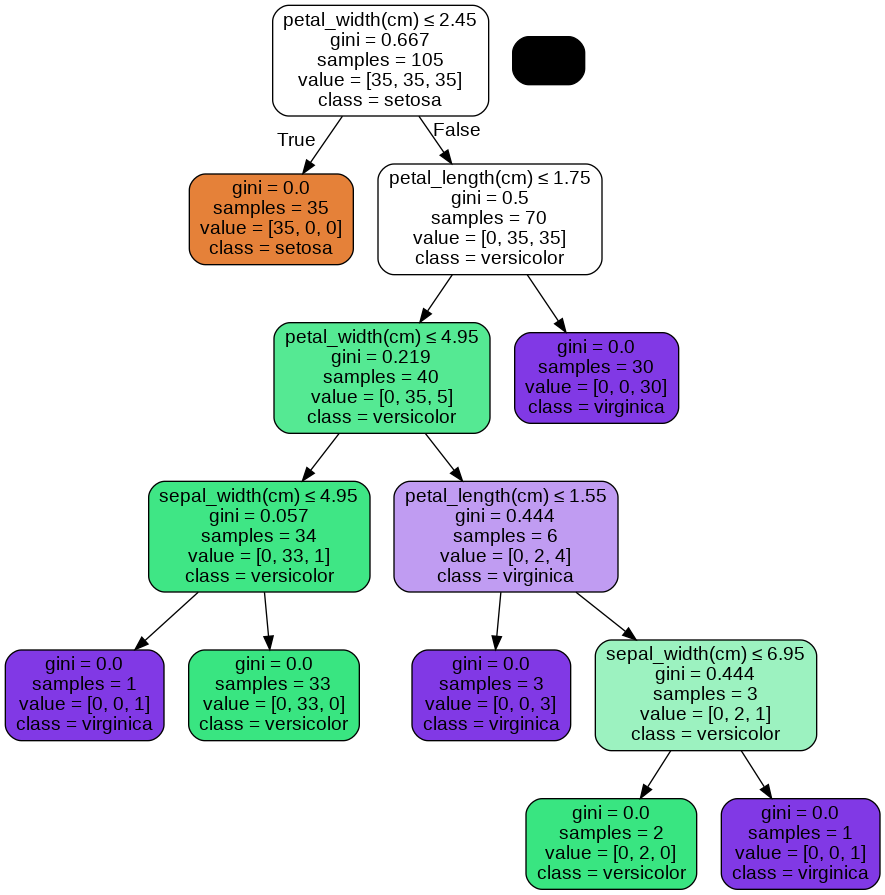

In [22]:
dot_data = export_graphviz(clf, out_file=None, feature_names = ['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'],
                          class_names=iris.target_names, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())